# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [3]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
df = pd.read_csv(url)

### Step 3. Assign it to a variable apple

In [4]:
apple = df
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [6]:
apple.Date = pd.to_datetime(apple.Date, infer_datetime_format=True)
apple.dtypes

/var/folders/46/mbfqnkdd62vdn30kdy8gwlxc0000gn/T/ipykernel_1338/495349761.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  apple.Date = pd.to_datetime(apple.Date, infer_datetime_format=True)


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [7]:
apple.set_index('Date', inplace=True)

### Step 7.  Is there any duplicate dates?

In [8]:
print("Are there duplicate dates?", apple.index.has_duplicates)

Are there duplicate dates? False


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [9]:
apple.sort_index(inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [10]:
last_business_days = apple.resample('BM').last()
last_business_days.head()

/var/folders/46/mbfqnkdd62vdn30kdy8gwlxc0000gn/T/ipykernel_1338/79438253.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  last_business_days = apple.resample('BM').last()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44


### Step 10.  What is the difference in days between the first day and the oldest

In [11]:
# Calculate the difference between last and first date
days_difference = apple.index[-1] - apple.index[0]

print(f"Time difference between first and last date: {days_difference}")
print(f"Number of days: {days_difference.days}")

Time difference between first and last date: 12261 days 00:00:00
Number of days: 12261


### Step 11.  How many months in the data we have?

In [15]:
# group data by month
months = apple.resample('ME').size().shape[0]
print(f"Number of months: {months}")

Number of months: 404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<Axes: xlabel='Date'>

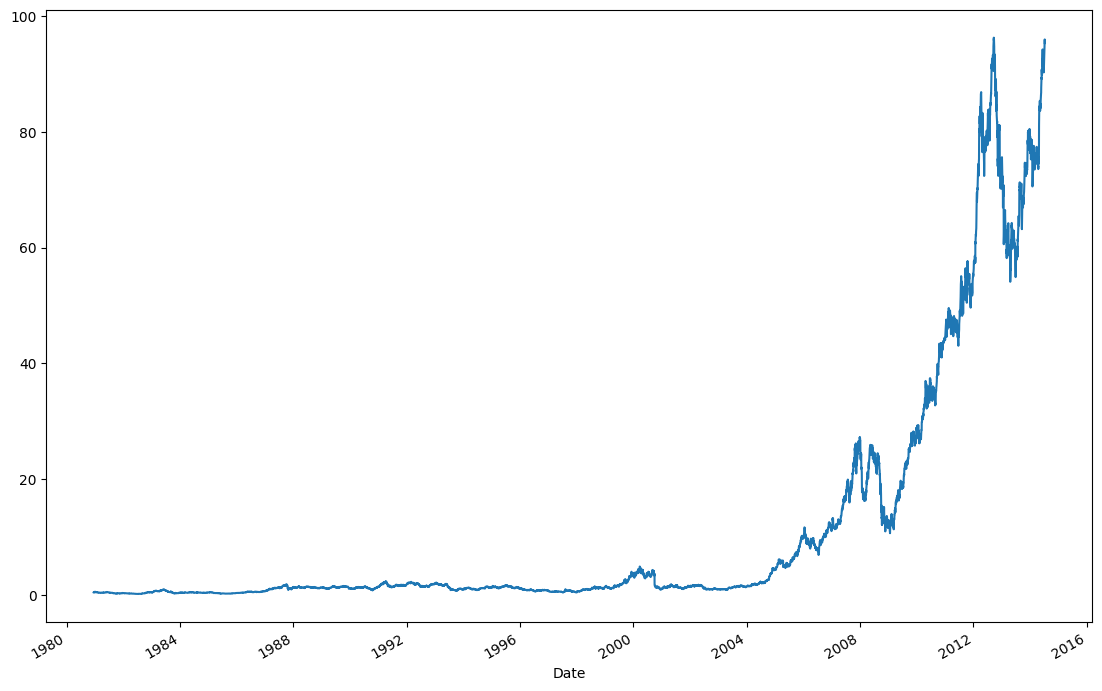

In [18]:
fig = plt.figure()
fig.set_size_inches(13.5, 9)
apple['Adj Close'].plot()

### BONUS: Create your own question and answer it.